In [24]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

Populating the interactive namespace from numpy and matplotlib


/home/lux/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Define model, train and show first analisises

http://euler.stat.yale.edu/~tba3/stat665/lectures/lec17/notebook17.html#III.-Visualizing-convolution-weights

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape = (1, 28, 28)))
model.add(Activation("relu"))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
          
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms)

/home/lux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., padding="same")`
  app.launch_new_instance()
/home/lux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/home/lux/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`


In [21]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0, validation_split=0.1)

In [22]:
print("Test classification rate %0.05f" % model.evaluate(X_test, Y_test, verbose = 0))
y_hat = model.predict_classes(X_test)
pd.crosstab(y_hat, y_test)

Test classification rate 0.14122
 9472/10000 [===========================>..] - ETA: 0s

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,974,0,3,0,1,3,11,2,15,3
1,0,1125,3,1,2,3,10,9,2,8
2,0,1,988,2,1,0,0,7,1,0
3,0,0,12,978,0,15,0,1,0,3
4,0,1,2,0,956,4,8,1,10,11
5,1,2,0,16,0,840,2,0,0,0
6,2,3,3,0,3,6,924,0,0,0
7,0,1,8,8,0,1,0,996,3,2
8,3,2,13,1,2,5,3,2,929,5


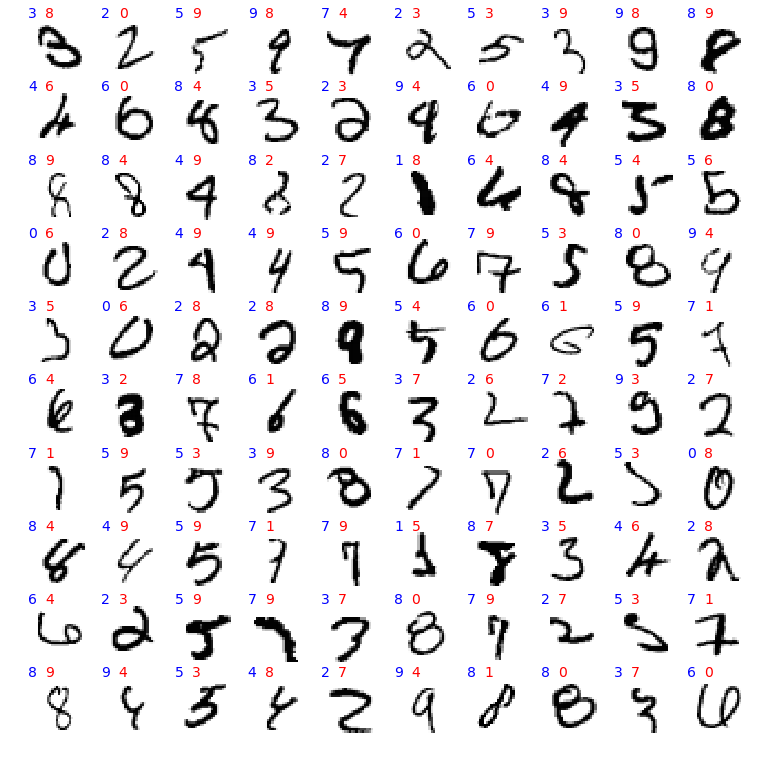

In [23]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

### Visualizing convolution weights

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
activation_6 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 28, 32)         9248      
_________________________________________________________________
activation_7 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 224)               0         
__________